In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
pip install --upgrade xgboost

In [39]:
#importing the required libraries to perform the ML regression for Serum cholestoral.

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor

#importing required libraries to perfrom hyperparameter tuning.
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score


#importing required libraries to evaluate the model perfromance.
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix

#importing required libraries to perfrom feature engineering and feature extraction.
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import RFE

#importing required libraries to for dataset scaling and model implementation.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

#importing libraries to visualize the evaluation metrics.
import matplotlib.pyplot as plt

#importing libraries to perfrom XAI techniques on the model.
import shap

#importing the libraries to save the models.
import pickle

In [ ]:
#loading the pre-processed dataset into the dataframe.

heart_data = pd.read_csv("preprocessed_dataset.csv")
display(heart_data.head(20))

,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [ ]:
#checking for NULL Values.

heart_data.isnull().sum()

,0
age,0
gender,0
chest_pain,0
resting_BP,0
serum_cholestoral,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


In [ ]:
# Create X from DataFrame and y as Target
X_disease = heart_data.drop(columns='target')
y = heart_data.target

In [ ]:
#scaling the attributes of the dataset to apply the RF model.
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_disease)
X = pd.DataFrame(scaler, columns=X_disease.columns)
X.describe()

,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.487528,0.738889,0.726389,0.431706,0.316905,0.112152,0.284123,0.567362,0.337047,0.385186,0.365492,0.194817,0.466641
std,0.187627,0.439546,0.317882,0.154089,0.106513,0.296113,0.416187,0.180363,0.472372,0.120739,0.250437,0.242003,0.404699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346939,0.000000,0.333333,0.333333,0.246622,0.000000,0.000000,0.436620,0.000000,0.295455,0.000000,0.000000,0.000000
50%,0.510204,1.000000,1.000000,0.416667,0.306950,0.000000,0.000000,0.577465,0.000000,0.318182,0.400000,0.133333,0.350000
75%,0.612245,1.000000,1.000000,0.500000,0.367278,0.000000,0.500000,0.704225,1.000000,0.465909,0.500000,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#splitting the dataset into test/train dataset with 75/25 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#applying RF model.

rf = RandomForestClassifier()
rf.fit(X_train, y_train) #training the model.

y_pred_rf = rf.predict(X_test) #predicting the target variable.

rf_accuracy = round(rf.score(X_test, y_test), 3) #calculating the accuracy of the model.
print('RandomForestClassifier accuracy : ', rf_accuracy) #printing the accuracy score.

RandomForestClassifier accuracy :  0.628


In [ ]:
#printing the value test counts.

y_test.value_counts()

,count
target,
0,84
1,53
2,26
3,11
4,6


# **Hyperparameter Tuning**.

In [ ]:
params = {
    'n_estimators': Integer(50, 500),  # integer range instead of fixed list
    'criterion': Categorical(['gini', 'entropy', 'log_loss']),
    'max_features': Categorical(['sqrt', 'log2'])
}

In [ ]:
rf = RandomForestClassifier(random_state=42)


In [ ]:
# Bayesian Optimization with Cross Validation
bayes_cv = BayesSearchCV(
    estimator=rf,
    search_spaces=params,
    n_iter=32,          # number of parameter settings to try
    cv=20,              # cross-validation folds
    n_jobs=-1,          # use all cores
    scoring='accuracy', # or another metric
    random_state=42
)

In [ ]:
bayes_cv.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.12/dist-pack

BayesSearchCV(cv=20, estimator=RandomForestClassifier(random_state=42),
              n_iter=32, n_jobs=-1, random_state=42, scoring='accuracy',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy', 'log_loss'), prior=None),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')})

In [ ]:
#printing the scores after hyperparameter tuning.
print("Best Parameters:", bayes_cv.best_params_)
print("Best CV Score ", bayes_cv.best_score_)


Best Parameters: OrderedDict({'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 50})
Best CV Score  0.6648148148148147


# **Feature Engineering**


In [ ]:
#creating derived features.

# Age group binning
X['age_group'] = pd.cut(X['age'], bins=[0, 40, 55, 70, 100], labels=[0,1,2,3])

# Cholesterol risk flag
X['high_chol'] = (X['serum_cholestoral'] > 240).astype(int)

# High blood pressure flag
X['high_bp'] = (X['resting_BP '] > 140).astype(int)

# Fitness adjusted max heart rate
X['fitness_index'] = X['thal'] / X['age']

# Interaction terms
X['oldpeak_slope'] = X['oldpeak'] * X['slope']
X['age_exang'] = X['age'] * X['exercise_angina']




In [ ]:
# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Fill numeric columns with median
for col in X.select_dtypes(include=[np.number]).columns:
    X[col] = X[col].fillna(X[col].median())

# Fill categorical columns with mode
for col in X.select_dtypes(include=['category', 'object']).columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# Ensure numeric dtype for Random Forest
X = X.astype(np.float32)

# **Feature Extraction** - Recursive Feature Extraction

In [ ]:
# RFE with 10 features (tune n_features_to_select as needed)
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

In [ ]:
# Selected features
selected_features = X.columns[rfe.support_]
display("Selected Features:", list(selected_features))

'Selected Features:'

['age',
 'chest_pain',
 'resting_BP ',
 'serum_cholestoral',
 'max_heart_rate',
 'oldpeak',
 'num_major_vessels',
 'thal',
 'fitness_index',
 'oldpeak_slope']

In [ ]:
# reducing the dataset with newly selected columns.
X_reduced = X[selected_features]

# Re-applying Random Forest Classifier.

In [ ]:
#splitting the data into 80/20 split.
X_train, X_test, y_train, y_test = train_test_split( X_reduced, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#re-applying random forest model.
rf_final = RandomForestClassifier(random_state=42, n_estimators=200)
rf_final.fit(X_train, y_train)

y_pred = rf_final.predict(X_test)

In [ ]:
# Evaluating the new model and getting confusion matrix.
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        72
           1       0.50      0.55      0.52        42
           2       0.20      0.07      0.11        14
           3       0.09      0.08      0.08        13
           4       0.00      0.00      0.00         3

    accuracy                           0.62       144
   macro avg       0.32      0.32      0.31       144
weighted avg       0.57      0.62      0.59       144


Confusion Matrix:
 [[65  6  1  0  0]
 [15 23  2  2  0]
 [ 1  6  1  6  0]
 [ 1 10  1  1  0]
 [ 0  1  0  2  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Implementing Boosting Techniques - ADABoost and Gradient Boost**.

In [ ]:
#Implementing AdaBoost with Random Forest model.

ada_model = AdaBoostClassifier(
    estimator=RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

In [ ]:
#Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


In [ ]:
# 4. Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔹 {name} Performance")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [ ]:
#evaluating the baseline model with Boosting models.
evaluate_model("Random Forest", y_test, y_pred)
evaluate_model("AdaBoost (with RF base)", y_test, y_pred_ada)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)



🔹 Random Forest Performance
Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        72
           1       0.50      0.55      0.52        42
           2       0.20      0.07      0.11        14
           3       0.09      0.08      0.08        13
           4       0.00      0.00      0.00         3

    accuracy                           0.62       144
   macro avg       0.32      0.32      0.31       144
weighted avg       0.57      0.62      0.59       144

Confusion Matrix:
 [[65  6  1  0  0]
 [15 23  2  2  0]
 [ 1  6  1  6  0]
 [ 1 10  1  1  0]
 [ 0  1  0  2  0]]

🔹 AdaBoost (with RF base) Performance
Accuracy: 0.6458333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        72
           1       0.51      0.69      0.59        42
           2       0.38      0.21      0.27        14
           3       0.20

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

# **EVALUATION**

In [36]:
# Ensure binary classification labels
y_train_bin = (y_train != 0).astype(int)
y_test_bin = (y_test != 0).astype(int)

In [37]:
#evaluation function
def evaluate_model(name, y_true, y_pred, y_scores):
    print(f"\n🔹 {name} Performance")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

    # Precision-Recall metrics
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    avg_prec = average_precision_score(y_true, y_scores)
    print(f"Average Precision (PR AUC): {avg_prec:.3f}")

    # Plot Precision-Recall curve
    plt.plot(recall, precision, label=f"{name} (AP={avg_prec:.2f})")


🔹 Random Forest Performance
Accuracy: 0.7291666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        72
           1       0.87      0.56      0.68        72
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.73       144
   macro avg       0.42      0.36      0.38       144
weighted avg       0.83      0.73      0.76       144

Confusion Matrix:
 [[65  6  1  0]
 [17 40  4 11]
 [ 0  0  0  0]
 [ 0  0  0  0]]
Average Precision (PR AUC): 0.802


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 AdaBoost (with RF base) Performance
Accuracy: 0.7291666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        72
           1       0.81      0.64      0.71        72
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.73       144
   macro avg       0.42      0.36      0.39       144
weighted avg       0.83      0.73      0.78       144

Confusion Matrix:
 [[59 11  2  0]
 [10 46  6 10]
 [ 0  0  0  0]
 [ 0  0  0  0]]
Average Precision (PR AUC): 0.599

🔹 Gradient Boosting Performance
Accuracy: 0.7569444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        72
           1       0.85      0.64      0.73        72
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

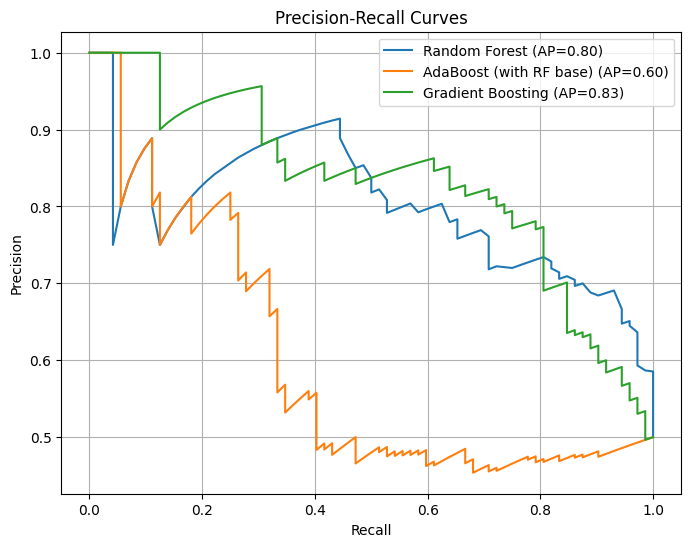

In [38]:
#evaluating all models
plt.figure(figsize=(8,6))
evaluate_model("Random Forest", y_test_bin, y_pred, rf_final.predict_proba(X_test)[:, 1])
evaluate_model("AdaBoost (with RF base)", y_test_bin, y_pred_ada, ada_model.predict_proba(X_test)[:, 1])
evaluate_model("Gradient Boosting", y_test_bin, y_pred_gb, gb_model.predict_proba(X_test)[:, 1])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True)
plt.show()

# **Saving the Model**.

In [40]:
#Saving the trained ML models.

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_final, f)

with open("adaboost_model.pkl", "wb") as f:
    pickle.dump(ada_model, f)

with open("gradient_boosting_model.pkl", "wb") as f:
    pickle.dump(gb_model, f)

print("Models saved successfully using pickle!")

Models saved successfully using pickle!


# **Importing the model.**

In [42]:
#Loading the saved models.
with open("random_forest_model.pkl", "rb") as f:
    rf_loaded = pickle.load(f)

with open("adaboost_model.pkl", "rb") as f:
    ada_loaded = pickle.load(f)

with open("gradient_boosting_model.pkl", "rb") as f:
    gb_loaded = pickle.load(f)

print("Models loaded successfully!")

Models loaded successfully!
